In [64]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns',None)

In [65]:
df=pd.read_csv('Cleaned.csv')
df.shape

(10682, 20)

In [66]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Hr,Duration_Min
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10,2:50,0,No Info,3897,24,3,2019,22,20,1,10,2,50.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7:25,2,No Info,7662,1,5,2019,5,50,13,15,7,25.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2,No Info,13882,9,6,2019,9,25,4,25,19h,NaN
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5:25,1,No Info,6218,12,5,2019,18,5,23,30,5,25.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4:45,1,No Info,13302,1,3,2019,16,50,21,35,4,45.0


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          10682 non-null  object 
 1   Date_of_Journey  10682 non-null  object 
 2   Source           10682 non-null  object 
 3   Destination      10682 non-null  object 
 4   Route            10682 non-null  object 
 5   Dep_Time         10682 non-null  object 
 6   Arrival_Time     10682 non-null  object 
 7   Duration         10682 non-null  object 
 8   Total_Stops      10682 non-null  int64  
 9   Additional_Info  10682 non-null  object 
 10  Price            10682 non-null  int64  
 11  Day              10682 non-null  int64  
 12  Month            10682 non-null  int64  
 13  Year             10682 non-null  int64  
 14  Dep_Hr           10682 non-null  int64  
 15  Dep_Min          10682 non-null  int64  
 16  Arr_Hr           10682 non-null  int64  
 17  Arr_Min     

In [68]:
df.describe()

,Total_Stops,Price,Day,Month,Year,Dep_Hr,Dep_Min,Arr_Hr,Arr_Min,Duration_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.0,10682.000000,10682.000000,10682.000000,10682.000000,9650.00000
mean,0.824190,9087.214567,13.509081,4.708575,2019.0,12.491013,24.409287,13.349186,24.690601,31.35544
std,0.675229,4611.548810,8.479363,1.164408,0.0,5.748820,18.767801,6.859317,16.506808,14.93004
min,0.000000,1759.000000,1.000000,3.000000,2019.0,0.000000,0.000000,0.000000,0.000000,5.00000
25%,0.000000,5277.000000,6.000000,3.000000,2019.0,8.000000,5.000000,8.000000,10.000000,20.00000
50%,1.000000,8372.000000,12.000000,5.000000,2019.0,11.000000,25.000000,14.000000,25.000000,30.00000
75%,1.000000,12373.000000,21.000000,6.000000,2019.0,18.000000,40.000000,19.000000,35.000000,45.00000
max,4.000000,79512.000000,27.000000,6.000000,2019.0,23.000000,55.000000,23.000000,55.000000,55.00000


<AxesSubplot:>

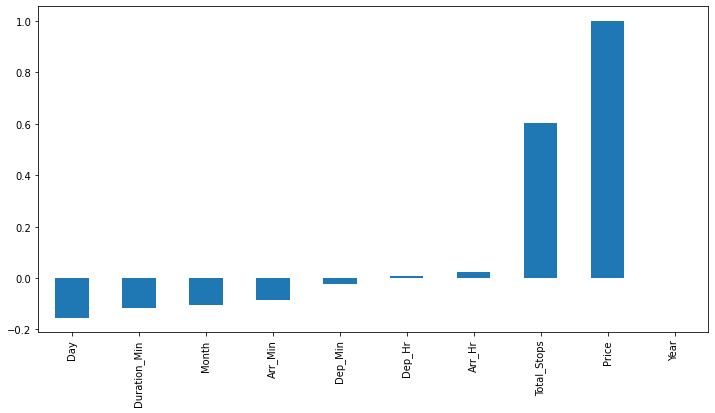

In [69]:
plt.figure(figsize=(12,6))
df.corr()['Price'].sort_values().plot(kind='bar')

In [70]:
df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

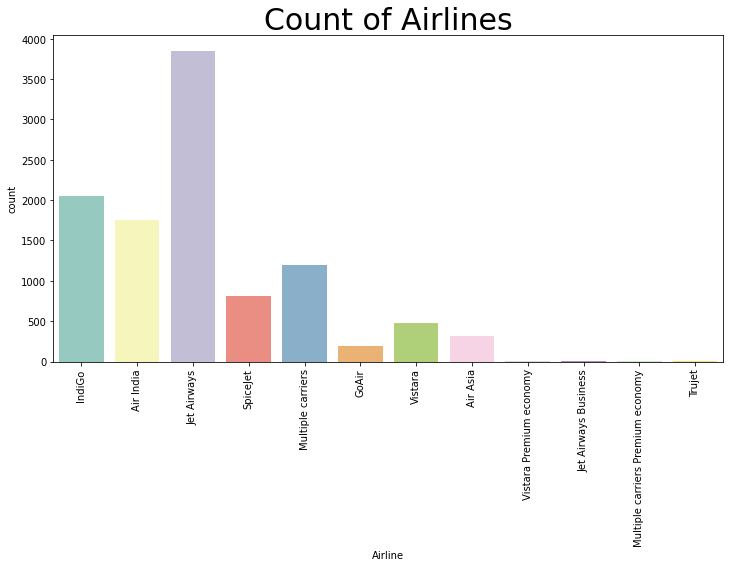

In [71]:
plt.figure(figsize=(12,6))
sns.countplot(x=df['Airline'], palette='Set3')
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=90)
plt.show()

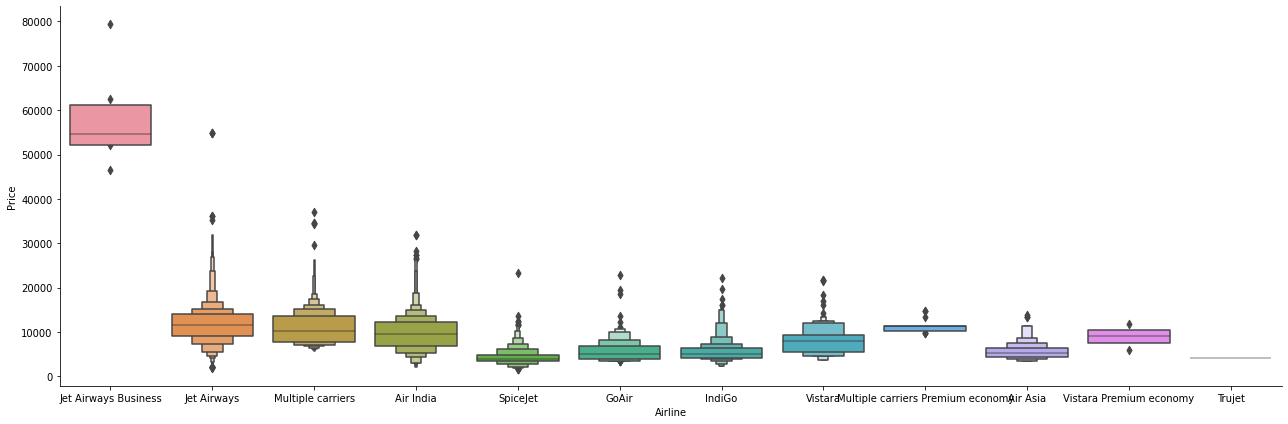

In [72]:
sns.catplot(y= "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [73]:
df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

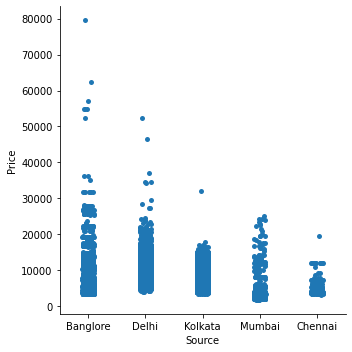

In [74]:

sns.catplot(y = "Price", x= "Source", data = df.sort_values("Price", ascending = False))

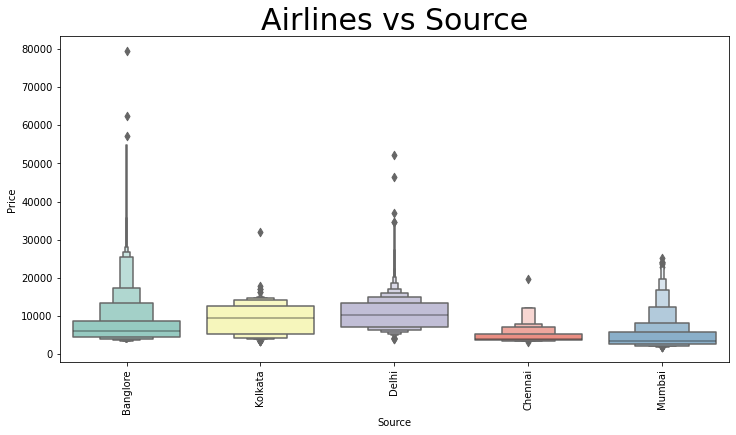

In [75]:
plt.figure(figsize=(12,6))
sns.boxenplot(x=df['Source'], y=df['Price'], palette='Set3')
plt.title('Airlines vs Source', size=30)
plt.xticks(rotation=90)
plt.show()


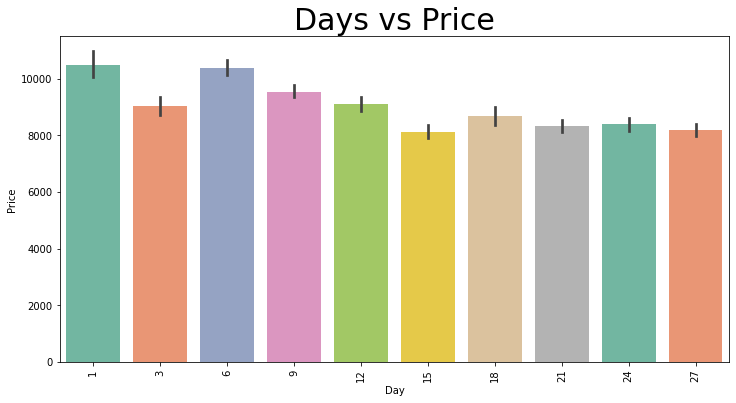

In [76]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Day'],y= df['Price'], palette='Set2')
plt.title('Days vs Price', size=30)
plt.xticks(rotation=90)
plt.show()


In [77]:
df['Duration_Hr'],_ = df['Duration_Hr'].str.split('h',1).str
df['Duration_Hr'] = df['Duration_Hr'].astype(int)
df['Duration_bool'] = (df['Duration_Hr']*60)+df['Duration_Min']

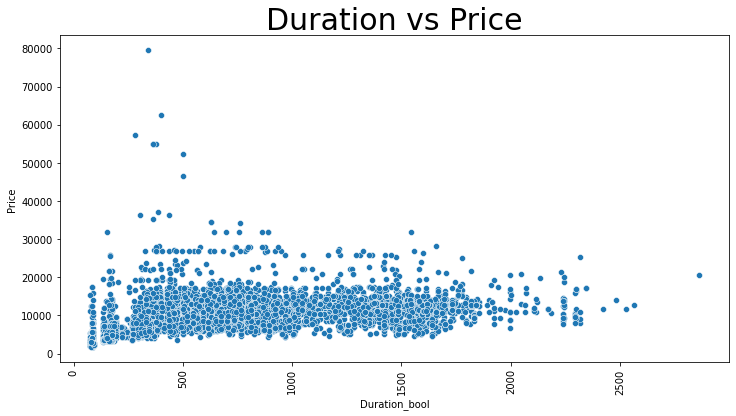

In [78]:
plt.figure(figsize=(12,6))
sns.scatterplot(x=df['Duration_bool'], y=df['Price'], palette='Set2')
plt.title('Duration vs Price', size=30)
plt.xticks(rotation=90)
plt.show()


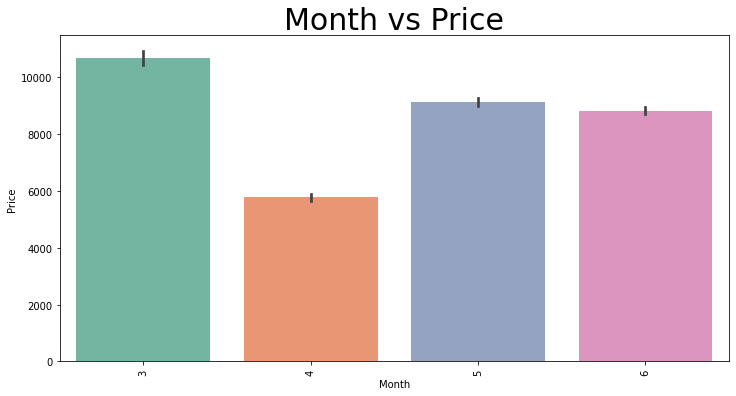

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Month'],y= df['Price'], palette='Set2')
plt.title('Month vs Price', size=30)
plt.xticks(rotation=90)
plt.show()


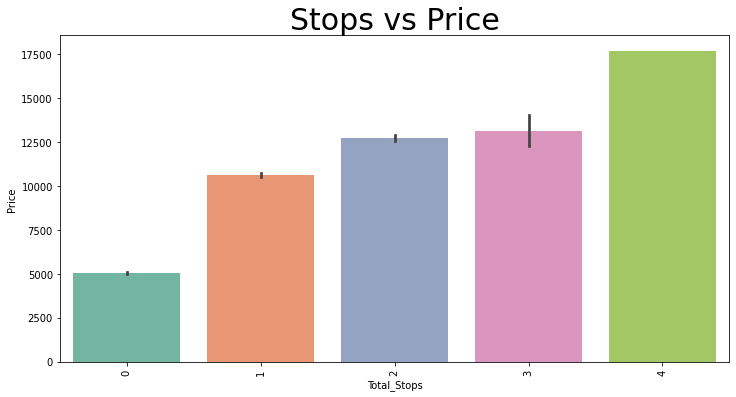

In [80]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Total_Stops'], y=df['Price'], palette='Set2')
plt.title('Stops vs Price', size=30)
plt.xticks(rotation=90)
plt.show()


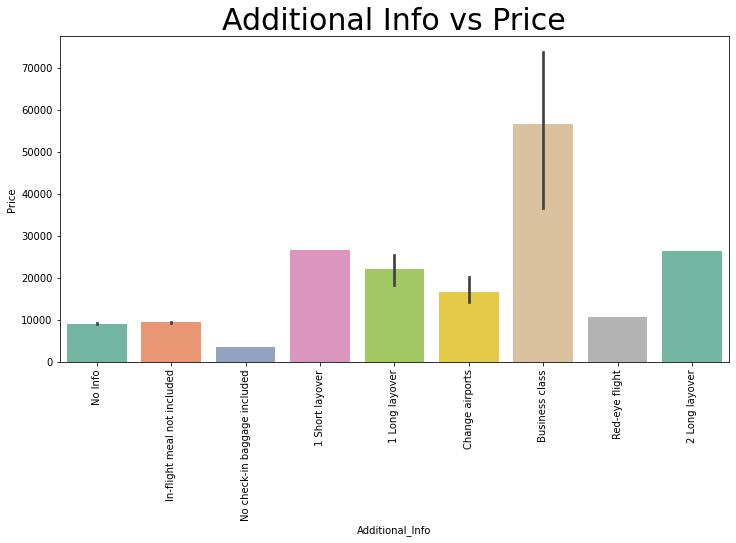

In [81]:
plt.figure(figsize=(12,6))
sns.barplot(x=df['Additional_Info'],y= df['Price'], palette='Set2')
plt.title('Additional Info vs Price', size=30)
plt.xticks(rotation=90)
plt.show()

In [82]:
ncol=["Duration_bool"]          
for i in ncol:
    q75, q25 = np.percentile(df.loc[:,i], [75 ,25])
    iqr = q75 - q25
    min = q25 - (iqr*1.5)
    max = q75 + (iqr*1.5)
    df = df.drop(df[df.loc[:,i] <= min].index)
    df = df.drop(df[df.loc[:,i] >= max].index)

In [83]:
df = df.dropna()


In [84]:
df.to_csv('Final.csv', index=None)